# Local Embeddings with OpenVINO

[OpenVINO™](https://github.com/openvinotoolkit/openvino) is an open-source toolkit for optimizing and deploying AI inference. The OpenVINO™ Runtime supports various hardware [devices](https://github.com/openvinotoolkit/openvino?tab=readme-ov-file#supported-hardware-matrix) including x86 and ARM CPUs, and Intel GPUs. It can help to boost deep learning performance in Computer Vision, Automatic Speech Recognition, Natural Language Processing and other common tasks.

Hugging Face embedding model can be supported by OpenVINO through ``OpenVINOEmbedding`` class, and OpenClip model can be through ``OpenVINOClipEmbedding`` class.

If you're opening this Notebook on colab, you will probably need to install LlamaIndex 🦙.

In [ ]:
%pip install llama-index-embeddings-openvino

In [ ]:
!pip install llama-index

## Model Exporter

It is possible to export your model to the OpenVINO IR format with `create_and_save_openvino_model` function, and load the model from local folder.

In [ ]:
from llama_index.embeddings.huggingface_openvino import OpenVINOEmbedding

OpenVINOEmbedding.create_and_save_openvino_model(
    "BAAI/bge-small-en-v1.5", "./bge_ov"
)

## Model Loading
If you have an Intel GPU, you can specify `device="gpu"` to run inference on it.

In [ ]:
ov_embed_model = OpenVINOEmbedding(model_id_or_path="./bge_ov", device="cpu")

Compiling the model to CPU ...


In [ ]:
embeddings = ov_embed_model.get_text_embedding("Hello World!")
print(len(embeddings))
print(embeddings[:5])

384
[-0.003275693394243717, -0.011690815910696983, 0.04155920818448067, -0.03814816474914551, 0.024183083325624466]


## OpenClip Model Exporter
Class `OpenVINOClipEmbedding` can support exporting and loading open_clip models with OpenVINO runtime.

In [ ]:
%pip install open_clip_torch

In [ ]:
from llama_index.embeddings.huggingface_openvino import (
    OpenVINOClipEmbedding,
)

OpenVINOClipEmbedding.create_and_save_openvino_model(
    "laion/CLIP-ViT-B-32-laion2B-s34B-b79K",
    "ViT-B-32-ov",
)

## MultiModal Model Loading
If you have an Intel GPU, you can specify `device="GPU"` to run inference on it.

In [ ]:
ov_clip_model = OpenVINOClipEmbedding(
    model_id_or_path="./ViT-B-32-ov", device="CPU"
)

## Embed images and queries with OpenVINO

Image:


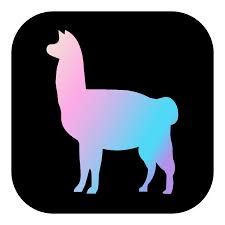

Image dim: 512
Image embed: [-0.03019799292087555, -0.09727513045072556, -0.6659489274024963, -0.025658488273620605, 0.05379948765039444]
Text dim: 512
Text embed: [-0.15816599130630493, -0.25564345717430115, 0.22376027703285217, -0.34983670711517334, 0.31968361139297485]
Cosine similarity: 0.27307014923203976


In [ ]:
from PIL import Image
import requests
from numpy import dot
from numpy.linalg import norm

image_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcStMP8S3VbNCqOQd7QQQcbvC_FLa1HlftCiJw&s"
im = Image.open(requests.get(image_url, stream=True).raw)
print("Image:")
display(im)

im.save("logo.jpg")
image_embeddings = ov_clip_model.get_image_embedding("logo.jpg")
print("Image dim:", len(image_embeddings))
print("Image embed:", image_embeddings[:5])

text_embeddings = ov_clip_model.get_text_embedding(
    "Logo of a pink blue llama on dark background"
)
print("Text dim:", len(text_embeddings))
print("Text embed:", text_embeddings[:5])

cos_sim = dot(image_embeddings, text_embeddings) / (
    norm(image_embeddings) * norm(text_embeddings)
)
print("Cosine similarity:", cos_sim)

For more information refer to:

* [OpenVINO LLM guide](https://docs.openvino.ai/2024/learn-openvino/llm_inference_guide.html).

* [OpenVINO Documentation](https://docs.openvino.ai/2024/home.html).

* [OpenVINO Get Started Guide](https://www.intel.com/content/www/us/en/content-details/819067/openvino-get-started-guide.html).

* [RAG example with LlamaIndex](https://github.com/openvinotoolkit/openvino_notebooks/tree/latest/notebooks/llm-rag-llamaindex).